In [1]:
import numpy as np
import random

class Leath():
    def __init__(self, N=150, p=0.5927):
        self.N = N
        self.p = p
        self.perimeter = {(N//2,N//2):False}
        self.cluster = {(N//2, N//2):True}
        self.world = np.zeros((N,N), dtype=np.int8)
        #initialize the perimeter 
        self.add_perimeter((N//2,N//2))
        
        self.spanning = False
        
        #Checking which borders we have touched for future use
        self.north = False
        self.south = False
        self.east = False
        self.west = False
        
    def span(self):
        if (self.north and self.south) or (self.east and self.west):
            self.spanning = True
        return self.spanning
    
    def add_perimeter(self, pt):
        #Given a point pt (tuple), add to a perimeter all 4 nearest neighbors that are not already in the cluster
        if pt not in self.cluster:
            return
        nn = [(pt[0]+1,pt[1]),(pt[0]-1,pt[1]),(pt[0],pt[1]+1),(pt[0],pt[1]-1)]
        for p in nn:

            if p not in self.cluster and p not in self.perimeter:
                if p[0] > self.N-1:
                    self.east = True
                    continue
                if p[0] < 0:
                    self.west = True
                    continue                 
                if p[1] > self.N-1:
                    self.south = True
                    continue    
                if p[1] < 0:
                    self.north = True
                    continue

                self.perimeter[p] = True
        

        
    def grow_cluster(self):
        new_cluster_pts = []
        #iterate through each point in perimeter if uniform random [0,1] is less than p add perimeter to cluster.
        #Else mark point as inaccessible. Do something to make sure cluster doesn't leave domain. 
        for item in self.perimeter:
            
            if self.perimeter[item] and self.p >= np.random.rand():
                new_cluster_pts.append(item)
                
            else:
                self.perimeter[item] = False 
        
        
        if new_cluster_pts == []:
            return False
        
        for item in new_cluster_pts:
            self.perimeter[item] = False
            self.cluster[item] = True
            self.add_perimeter(item)
        return True
        
    def getCluster(self):
        return self.cluster
    
    def make_World(self):
        for key, value in self.cluster.items():
            if value == True:
                self.world[key[0]][key[1]] = 1
        return self.world
            
    def densities(self, r=4):
        r_s = []
        dn = []
        increment = r
        
        copy = self.make_World()
        while(r<(self.N//2)-4):
            r_s.append(r)
            workon = copy[(self.N//2)- r:(self.N//2) + r , (self.N//2)-r:(self.N//2)+r]
            mass = np.count_nonzero(workon == 1)
            dn.append(mass)
            r += increment
        return r_s, dn 
        

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

truefalse = True

test = Leath()
while(truefalse):
    truefalse = test.grow_cluster()



False


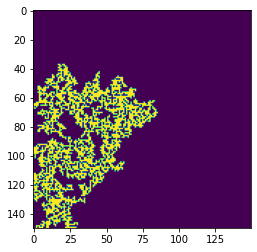

In [3]:
#Test for span, save if spans
#Find center of mass (count of items)
#Do histogram trick to calculate density for a given R
#Do different radiuses and calculate the density of each radius 
#Average densities across clusters
#Plot Averages 
testworld = test.make_World()

print(test.span())

img = testworld

imgplot = plt.imshow(img)



10


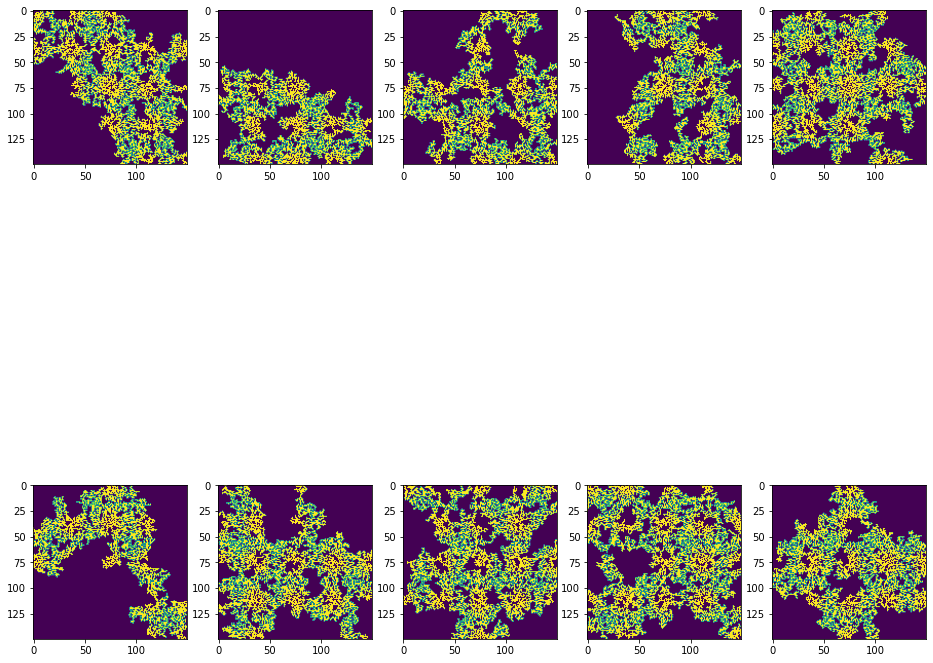

In [4]:
tenspan = 0
clusters = []

fig=plt.figure(figsize=(16, 16))

while(tenspan<10):
    cluster = Leath()
    while(cluster.grow_cluster()):
        cluster.grow_cluster()
    if cluster.span() == True:
        tenspan+=1
        clusters.append(cluster)

print(len(clusters))

for i in range(1, 11):
    img = clusters[i-1].make_World()
    fig.add_subplot(2, 5, i)
    plt.imshow(img)
plt.show()

Dimension 1 : 1.810456394280339
Dimension 2 : 1.6363439673274582
Dimension 3 : 1.7888088375782942
Dimension 4 : 1.6777160565222875
Dimension 5 : 1.8657685603841851
Dimension 6 : 1.803052308252682
Dimension 7 : 1.9931548505423569
Dimension 8 : 1.9055287967565189
Dimension 9 : 1.9375460251912877
Dimension 10 : 1.9311242631270742


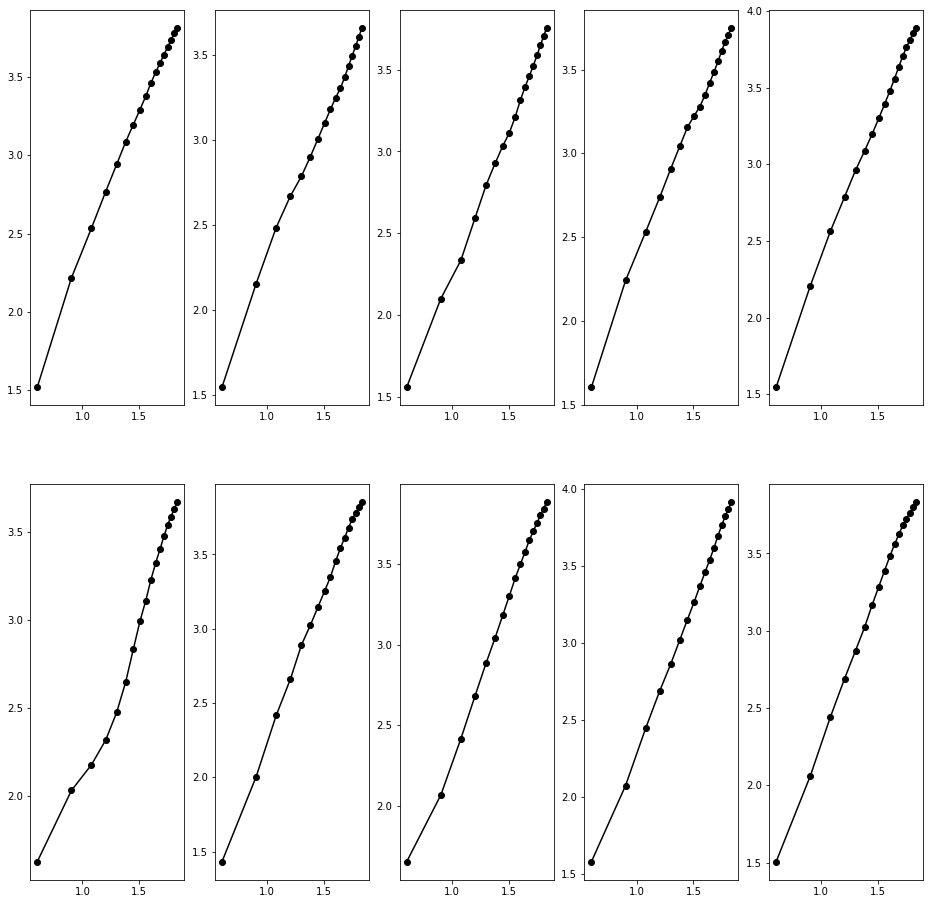

In [7]:
from scipy.stats import linregress
dimensions = []
rsover = []
allmasses = []
fig = plt.figure(figsize=(16, 16))



for i in range(1, 11):
    rs, masses = clusters[i-1].densities()
    m, b = np.polyfit(np.log10(rs), np.log10(masses), 1)
    dimensions.append(m)
    
    allmasses.append(masses)
    rsover = rs
    fig.add_subplot(2, 5, i)
    im = plt.plot(np.log10(rs), np.log10(masses), "ko-")
    
for i in range(10):
    print("Dimension", i+1, ":", dimensions[i])


Average dimension: 1.836005695656168


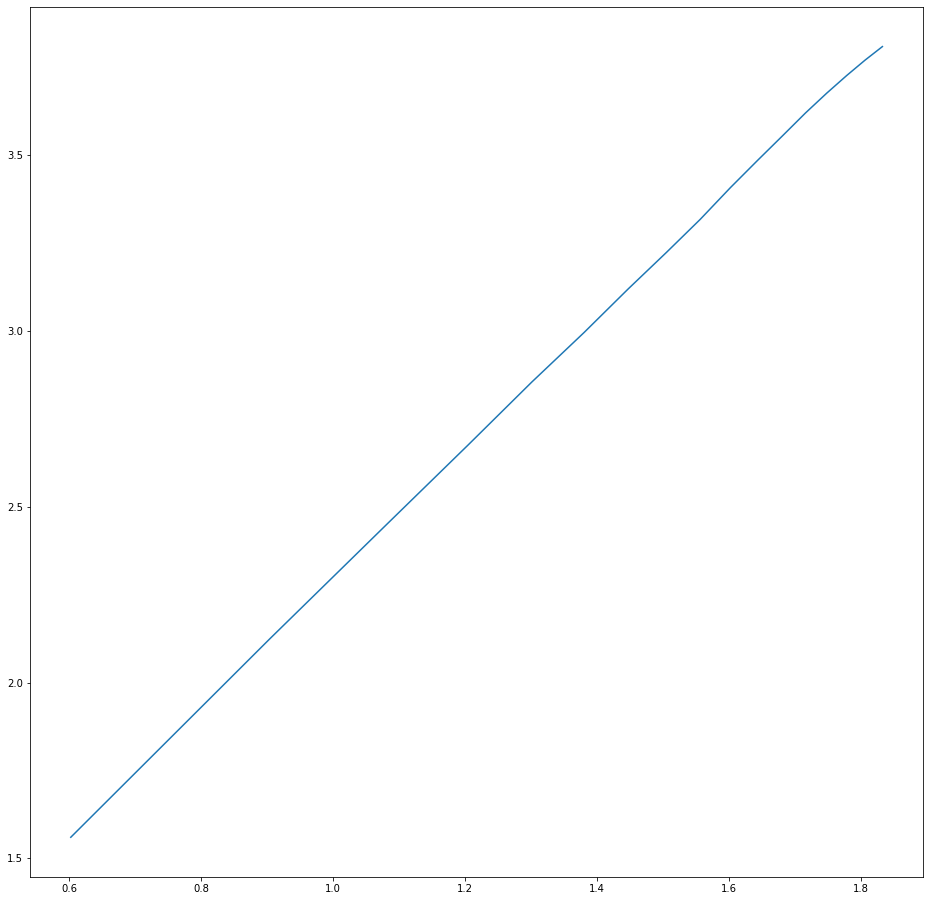

In [8]:
fig = plt.figure(figsize=(16, 16))
values = []

for i in range(len(allmasses[0])):
    value = 0
    for j in range(len(allmasses)):
        value+=allmasses[j][i]
    values.append(value/10)

im = plt.plot(np.log10(rsover), np.log10(values))
m, b = np.polyfit(np.log10(rsover), np.log10(values), 1)
print("Average dimension:" , m)


